In [5]:
import Pkg
Pkg.activate("../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
using LinearAlgebra
using Distributions
using Plots

includet("kalman_filter.jl")

Log-likelihood: -154.25480202886075


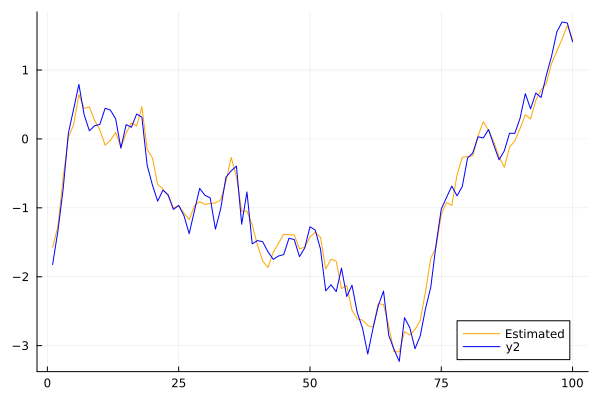

In [19]:

# Example usage
function main()
    # Simulate a simple multivariate state-space model
    T = 100  # Time steps
    m = 2    # State dimension
    n = 2    # Observation dimension
    
    # Model parameters
    A = [0.9 0.1; 0.2 0.8]  # State transition matrix
    C = [1.0 0.0; 0.0 1.0]  # Observation matrix
    Q = 0.1 * I(m)           # State noise covariance
    R = 0.1 * I(n)           # Observation noise covariance
    x0 = zeros(m)            # Initial state mean
    P0 = I(m)                # Initial state covariance
    
    # Simulate data
    x = zeros(T, m)
    y = zeros(T, n)
    x[1, :] = rand(MvNormal(x0, P0))
    
    for t in 1:T-1
        x[t+1, :] = A * x[t, :] + rand(MvNormal(zeros(m), Q))
        y[t, :] = C * x[t, :] + rand(MvNormal(zeros(n), R))
    end
    y[T, :] = C * x[T, :] + rand(MvNormal(zeros(n), R))
    
   # Run Kalman filter
    x_filt, P_filt, x_pred, P_pred, loglik = kalman_filter(y, A, C, Q, R, x0, P0)
    
    
    # Run Carter-Kohn smoother
    x_smooth, P_smooth = carter_kohn_smoother(x_filt, P_filt, x_pred, P_pred, A, Q)
    
    # Print results
    println("Log-likelihood: ", loglik)
    plot(x_smooth[:,1]; color="orange", label="Estimated")
    plot!(x[:,1]; color="blue", labe="True")
 
end

# Run the example
main()

inflation = inflation_trend  + cycle_inflation
short_rate = short_rate_trend + inflation_trend + cycle_inflation

state = [pi_tau, r_tau, pi_c, r_c]


In [ ]:
[1 0 1 0
     1 1 0 1]

In [ ]:
T = [1 0 0 0
     0 1 0 0
     0 0 Φ11 Φ12
     0 0 Φ21 Φ22 
    ]

Z = [1 0 1 0
     1 1 0 1]

     R = [1 0
          0 1]

In [ ]:
with more p
state  = [pi_tau, r_tau, pi_c, r_c pi_c_1, r_c_1]
T = [1 0 0 0 0 0
     0 1 0 0 0 0 
     0 0 Φ11 Φ12 Φ112 Φ122
     0 0 Φ21 Φ22 Φ212 Φ222
     0 0 1 0 0 0 
     0 0 0 1 0 0 
     0 0 0 0 0 0
     0 0 0 0 0 0  
     ]


In [1]:
B = [.2 .1
    .4 .3]

2×2 Matrix{Float64}:
 0.2  0.1
 0.4  0.3